![](images/ML-Diagram.png)

<font color='grey'>
    
### Major Machine Learning Algorithms: 
    
2. **Classification**

    We use classification algorithms for predicting a set of items’ class or category.

    Classification algorithms:
    * K-Nearest Neighbors
    * Decision Trees
    * Random Forest
    * Support Vector Machine
    * Naive Bayes
    
    
</font>

<font color='grey'>

### Getting Started with K-Nearest Neighbors Algorithm

The KNN algorithm is very simple and very effective. It is widely applied in areas like finance, political science, handwriting detection, and image recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. It is used for solving both classification and regression problems.
    
KNN is best shown through an example! Imagine we had some imaginary data on dogs and horses with heights and weights. If we plot them out we have something like this…

<img src='images/KNN.png'>
    
The red points indicate the horse and the blue points dog. What we want to know is if we get a new animal(new data point) that we only know its height and weight, can we be able to classify it as a dog or a horse? Based on where the green points lie and its association with the neighboring points it's kinda easy to predict what it is.

For instance, the top most point would probably be a horse since all the points around it are red for a horse. Likewise, the point on the bottom left will be a dog. The middle point will depend on the number of neighbors you choose to consider. let’s see how you choose k as choosing a K will affect what class a new data point will be assigned to. Consider the case below.
    
<img src='images/KNN1.png'>
    
Here training data has been plotted which are yellow points for class A and purple points for class B. The red star indicates a new data point. We want to predict whether this point belongs to class A or class B. If we choose K is equal to 3 then we will look at the three nearest neighbors to this new point and obviously predict the point belongs to class B. However, if we set K is equal to six we will have a majority of yellow points and end up predicting the new point belongs to class A. The number of neighbors is the core deciding factor. You can think of K as a controlling variable for the prediction model.
    
The model representation for KNN is the entire training dataset. Simple right? Predictions are made for a new data point by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression problems, this might be the mean output variable, for classification problems this might be the mode (or most common) class value.
    
The trick is in how to determine the similarity between the data instances. The simplest technique if your attributes are all of the same scale (all in meters for example) is to use distance measures such as the Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance a number you can calculate directly based on the differences between each input variable.
    
**Pros**
* It’s very simple.
* Works with any number of classes.
* You can update and curate your training instances over time to keep predictions accurate.
* Few parameters are required. Most of the time its K and the distance metrics making turning the parameters easy.

**Cons**
* The idea of distance or closeness can break down in very high dimensions (lots of input variables) which can negatively affect the performance of the algorithm on your problem. This is called the curse of dimensionality. It suggests you only use those input variables that are most relevant to predicting the output variable.

    
    
### Fully Explained K-Nearest Neighbors with Python

>*The main goal is to predict the new data point based on samples near that data point. These sample points can be based on k-value or radius-based. The k value is defined by the user and the radius is base on the density of data points.*
    
>*To measure the distance between the new point and samples point near it is based on Euclidean distance or by Manhattan distance the former one is mostly used. Well, there are many distance metrics used to measure the distance like Chebyshev, Minkowski is in vector space with real values.*
    
>*There are many other distance metrics also as shown below:*
    
>* Haversine: used when there are radian values on input and output.
>* Hamming: It is used to calculate the equal length in the binary string.
>* Jaccard: It is based on the similarity point between two groups.
    
>*Talking about the different distances because they play important role in many learning algorithms in classification and clustering. A good distance metric always speeds up the time that good for good performance optimization.*

>*The algorithm takes some type of searching in the machine learning as shown below:*
    
>* **Brute Force search:** It is used for fast searching of the nearest neighbor. It is good small data set and not feasible when the data set grows.*
    
>* **K-D Tree:** It comes to overcome the problem of brute force. This is based on tree type structured and the distance searching is based on the association. If X is far from Y and Z is near to Y then Z is also far to X. So, to make the fast search optimization is done in this tree. But when the neighbor points grow after a limit value then is not feasible too.*
    
>* **Ball Tree:** It is developed to overcome the more neighbor dimension problem in the KD tree. It constructs a nested hyper-spherical geometry that useful in high dimensions.*
    
>*In the case of regression in k neighbor, the data should be in continuous form. A weight parameter is used to assigned as uniform or distance to make the prediction line.*
    
>*Choosing the right value to K is also important and it can be chosen by the error rate graph, the value with less error will be the optimized k value.*

>*Implementing the KNN algorithm with python.*
</font>

####  Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data

In [2]:
data = pd.read_csv('Classified_data.csv',index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


<font color='grey' type='Arial'>

### Preprocessing: Standardizing the Values

>*We want our features to be unit-independent, that is, not reliant on the scale of the measurement involved: for example, you could have a measured feature expressed in meters and I could have the same feature expressed in centimeters. If we both scale our respective data, this feature will be the same for each of us. Also, our predictor variables may have significantly different ranges and, in certain situations, such as when implementing KNN, this needs to be mitigated so that certain features do not dominate the algorithm.*
    
#### Standardizing the variables
    
        Here we import the StandardScaler and instantiate it to a variable scaler. Next, we use the fit_transform method to fit our data (without the target class) then transform it. Lastly, we create a new DataFrame with the scaled features and we take columns from our original df. We use slicing to take all the column names without the last one ‘TARGET CLASS’.
</font>

In [3]:
# Before modeling the model, we need to scale the data because of the variation of low and high values.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
# Droping the target variable with asix=1 as column and the independent features.

#transform the data
scaled_features = scaler.fit_transform(data.drop('TARGET CLASS',axis=1))

In [5]:
# Now, making a variable to save all the independent features in it.

df_feat = pd.DataFrame(scaled_features,columns = data.columns[:-1])
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


#### The Train Test Split

    We do not want to use all the data to train our model so that we can have some to measure the performance of our model. If we train our model on a dataset D, reporting the accuracy of the model on the same data D may make it look as though it performs better than it actually does. This is known as overfitting. To deal with this issue, we will train the model on a subset of the data, called the training set and evaluate its performance on the rest of the data, the testing set. This is precisely what we’re going to do here! We will use approximately 70% of the scaled data for training and 30% for testing.


In [6]:
# Now we will divide the data into train and test set.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_features,data['TARGET CLASS'],test_size=0.30)

<font color='grey'>

### The Building of the KNN Model

>*We are now going to build our model. we instantiate the KNeighborsClassifier to a variable knn. We pass n_neighbors as an argument with 1 neighbor as our starting point. Distance metrics can also be specified but we will go with the default one Minkowski. Other values include hamming and manhattan etc. n-jobs is for the number of parallel jobs to run for neighbors' search. None means 1 and -1 means using all processors. We then fit our model with the training data.*
    
**Building our KNN Model**
</font>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predictions & Model Evaluation

    Here we are going to predict the test data set that was previously split and compare these predictions to the ground truth in order to get a measure of model performance

In [8]:
from sklearn.metrics import accuracy_score
pred = knn.predict(X_test)
accuracy_score(y_test,pred)

0.9033333333333333

#### Choosing a K Value

    We are going to use the Elbow method to choose an optimal value for k. We start with an empty list to hold our error rate. Then we have a loop that we will allow us to train the knn model 39 times with the value of k being values 1 to 39. We will end up with 39 knn models. You can choose a lower number of models if you want to, there is no rule here. Our error rate is going to be the averages of where the predicted values are not equal to the actual test value.

In [9]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

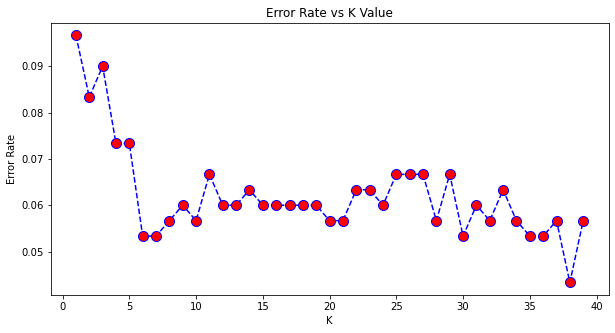

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,c='blue',ls='--',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


    It looks like we started with a high error rate when we went with a lower value of k and eventually going up and down we start to lower our error rate. For other data sets, this may be a little smoother. The reason why our plot looks bumpy is because the error rate is already very low. I will go with k is equal to 12 as the optimal value and see the accuracy score I get. We build the model again below.

In [11]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test,pred))

Accuracy Score: 0.94


<font color='grey'>

### Decision Trees in Machine Learning (ML)

**Table of Contents**

1. What is a Decision Tree?
2. Decision Tree Example
3. Building a Decision Tree
4. Node Impurity
5. Entropy
6. Gini
7. Overfitting in Decision Tree Learning
8. Pruning
9. Advantages and Disadvantages of Decision-tree-based Classification
10.Code Implementation
11.Advanced Decision Trees
12.Conclusion
13.Resources
14.References

### What is a Decision Tree?

A decision tree is a vital and popular tool for classification and prediction problems in machine learning, statistics, data mining, and machine learning [4]. It describes rules that can be interpreted by humans and applied in a knowledge system such as databases. Fundamentally, a decision tree T encodes d (a classifier or regression function) in the form of a tree structure which presents the following attributes:

* Decision node: It defines a test on a single attribute.
* Leaf node: It shows the value of the target attribute.
* Edge: It is a split of one attribute.
* Path: It is a disjunction of the test to make the final decision.

These are other names that decision trees are known as:

* Tree classifier.
* Divide and conquer strategy.
* Hierarchical classifier.
* Multistage classifier.

It classifies cases by commencing at the tree’s root and passing through it unto a leaf node.
    
<img src='images/Decission tree.png'>
    
A decision tree uses nodes and leaves to make a decision.
    
<img src='images/vector classification.png'>

Representation of the classification above in the form of a decision tree:
    
<img src='images/DT-Classification.png'>
    
### Decision Tree Example
    
**Problem Statement**
Predict the result of the basketball game between two different teams — team1 and team2.
    
**List of Usable Knowledge or Attributes related to the Game**
    
* Did Peter play center or forward?
* What was the location of the game — home or away?
* What was the start time of the game?
* Was the opponent’s center tall or not?
    
**Historical Data**

<img src='images/Historical data.png'>

**Data for Prediction**
    
<img src='images/Data for the prediction.png'>
    
Therefore, based on figure 5, historical and prediction data:
    
* Generalize the learned rule to new data.
* It is a classification problem.
 
    
### Building a Decision Tree
    
Decision tree learning involves learning a sequence of if/else queries that get us to the “true” answer almost immediately. These questions are also called test. It searches over all possible tests and finds the one that is most instructive about the target variable.
    
#### How to grow a decision tree?
    
* The top node is also called the root, and it represents the whole dataset.
* A decision tree progressively splits the training set into smaller and smaller subsets.
* If the test is “true” — a point is assigned to the left node; otherwise, it is assigned to the right node.
* A leaf of a tree that contains data points and it shares the same target values is called pure [1].
* A prediction on a new data point is made by examining which region of the partition of the feature space the point lazes in and then predicting the majority target in that region [1].
    
>*from sklearn.tree import DecisionTreeClassifier*  
>*from sklearn.datasets import load_breast_cancer*
>*from sklearn.model_selection import train_test_splitcancer = load_breast_cancer()X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)*

<img src='images/accuracy.png'> 
    
* If we do not restrict a decision tree's depth, it can become arbitrarily deep and complex.
* As shown in figure 6, the accuracy on the training set is 100% — because the leaves are pure, the tree has grown deep enough to remember all the labels on the training data unquestionably.
* The tree can grow vast and such kinds of trees are hard to understand. Larger trees are typically less accurate than smaller trees [2].
    
Code implementation to create leaf of a decision tree (The leaf is created based on the ml_tasks — regression or classification):

        def create_leaf(data, ml_task):
        label_column = data[:, -1]

        if ml_task == "regression":
            leaf = np.mean(label_column)
        else:
            unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
            i = counts_unique_classes.argmax()
            leaf = unique_classes[i]

        return leaf

The main aim of a decision tree is to select appropriate features for splitting the tree into subparts. Then we apply an ID3 algorithm in the background during splitting.

### Node Impurity
Node impurity is the homogeneity within a node. A node is impure if cases have more than one value for the response. A node is pure if all instances have the same value for the response or target variable or impurity = 0.
    
These are the two most popular methods for measuring node impurity:

* Entropy.
* Gini.
    
The best split is selected based on the degree of impurity of the child nodes. Node impurity is 0 when all patterns at the node are of the same category. Impurity becomes maximum when all the classes at node N are equally likely.

Code snippet to check for purity:
    
    
        def check_purity(data):
        label_column = data[:, -1]
        unique_classes = np.unique(label_column)

        if len(unique_classes) == 1:
            return True
        else:
            return False
    
### Entropy
In a decision tree, entropy is a kind of disorder or uncertainty. It is the measure of impurity, disorder, or uncertainty in a bunch of data. It is a way to control the split of data decided by a decision tree. It influences how a decision tree forms its boundaries. We use entropy to measure the impurity or randomness of a dataset.

Given the equation of entropy shown below:    
    
<img src='images/Equation of Entropy.png'>

Code snippet to calculate entropy:
    
        def get_entropy(data):
        label_col = data[:, -1]
        a, counts = np.unique(label_col, return_counts=True)
        prob = counts / counts.sum()
        entropy = sum(probabilities * -np.log2(probabilities))

        return entropy

A simple example of entropy:
    
Let’s say there is a bag which depicts two different scenarios:
    
* Bag A has 100 green balls. Peter wants to choose a green ball from this bag. Here, Bag A has 0 entropy because it implies 0 impurities or total purity.

* We replace 40 green balls in bag A with red balls, and similarly, we replace 10 green balls with black balls. Now, John wants to choose a green ball from this bag. In this case, the probability of drawing a green ball will drop down from 1.0 to 0.5 due to the increase in the bag's impurity.
    
**Shannon’s entropy** model uses the logarithm function with base 2 (log2(P(x)) to measure the entropy.
    
**Shannon’s Information Theory**
    
There are only two classes — Yes, No.
    
In our example, t is a set of messages sent to a receiver that must guess their class so:
    
* If p(Yes | t) = 1 (resp., p(No | t) = 1), then the receiver guesses a new example as yes. No message needs to send.
    
* If p(Yes | t) = p (No | t) = 0.5, then the receiver cannot guess, and we must tell them the class of a new example, sending a one-bit message.
    
* If 0<p(Yes | t) < 1, then the receiver needs less than one-bit on average to know the class of a new example.

**Information Gain**
    
Information Gain measures how much information a feature provides about the class.
Information Gain is significant in a Decision tree due to the points below:
    
* It is the primary key accepted by the Decision tree algorithm to build a Decision tree.
    
* The Decision Tree will evermore try to maximize information gain.
    
* The attribute which has the highest information gain will be tested or split first.
    
The figure below shows the equation for Information Gain:

<img src='images/The equation of information gain..png'>
    
**Example of Entropy Calculation**
    
There is a road to drive vehicles, and that road has multiple features like grade, bumpiness, speed limit, and others.
    
This is the dataset:

<img src='images/Road dataset.png'>
    
**Features:**
    
* Condition
    
* Bumpiness
    
* Speed Limit
    
**Label:**
    
* Speed
    
Total number of observations: 4
    
**Calculate the entropy of Grade Feature:**
    
Take labels as a parent node like SSFF → Slow Slow Fast Fast.
    
The entropy of SSFF:
    
P(Slow) = 2/4 = 0.5
    
P(Fast) = 2/4 = 0.5
    
So, the entropy of SSFF:
    
The entropy of parent = {0.5 log2(0.5) + 0.5 log2(0.5)} = -{-0.5 + (-0.5)}
    
Hence, The entropy of parent = 1
    
Next, to find the grade feature's information gain, split the parent node by the grade feature, as shown in figure 10.   
<img src='images/The split of the parent node by the grade feature.png'>
 
Calculate the entropy of both (left and right) children node SSF and F, respectively.
    
The entropy of **node F** = 0 (Note: 0 because all are from the same class)
    
The entropy of **node SSF**:
    
P(Slow) = 2/3 = 0.334
    
P(Fast) = 1/3 = 0.334
    
So, Entropy of node SSF = -{0.667 log2 (0.667) + 0.334 log2(0.334)}
    
= -{-0.38 + (-0.52)} = 0.9
    
<img src='images/Number of nodes in the parent node and children nodes.png'>  
<img src='images/The equation to calculate the entropy of the children nodes.png'>
<img src='images/The entropy of the child node with a weighted average.png'>
    
The information gain of grade from the equation = 1–0.675 = 0.325
    
The range of entropy lies between 0 to 1.
    
### Gini
    
Like entropy, the Gini index is also a type of criterion in decision trees that serves to calculate information gain. Information gain is used by the decision tree to split a node. Gini measures the impurity of a node.
    
The range of Gini lies between 0 to 0.5. Gini impurity is better compared to entropy for selecting the best features [3].
    
The equation of the Gini index to measure impurity:
<img src='images/Equation of Gini.png'>
 
The split criterion in Gini index:
    
* It assumes that there exist several possible split values for each attribute.
    
* All attributes are assumed continuous-valued
    
* It can be modified for the categorical attributes.
    
### Overfitting in Decision Tree Learning
    
Overfitting is a severe problem in machine learning that leads to the worst performance issue in the model. Similarly, the decision tree can also face the problem of overfitting due to the issues below:

* If the decision tree grows too far.
    
* If the number of instances in the decision tree gets smaller as the tree is built.
    
We use pruning to avoid overfitting in decision trees.
    
### Pruning
    
Pruning is the process of adjusting the decision tree to minimize misclassification errors. It is the inverse of splitting.
    
There are two ways to perform Pruning:
    
* Pre-pruning.
    
* Post-pruning.
    
It Identifies and removes branches that reflect noise or outliers.
    
**Complete Tree**
    
A complete tree indicates the stopping pattern for the tree. It follows the steps below:
    
* If all the records belong to the same class, then stop expanding a node.
    
* If all the records have the same attribute values, then stop expanding a node.
    
**Pre-pruning**
    
In the pre-pruning approach, the tree does not grow entirely. It follows the early stopping rule. It follows the below steps:
    
* Stops the algorithm before it becomes a fully-grown tree.
    
* Stops if all instances belong to the same class.
    
* Stops if all attribute values are the same.
    
**Post-pruning**
    
Post-pruning is the most popular approach in the decision tree to avoid overfitting. It essentially solves the issue of overfitting by following the below steps:
    
* Completly grow the decision tree.
    
* Follow the bottom-up approach to trim the nodes of the decision tree.
    
* If the error of generalization improves after the trimming of nodes, replace the sub-tree with a leaf node.
    
* In a sub-tree, the class label of the leaf node is determined by the majority class.
    
### Advantages and Disadvantages of Decision-tree-based Classification
    
These are the advantages and disadvantages of decision-tree-based classification:

**Advantages**
    
* It is very cheap to build.
    
* It gives outstanding accuracy.
    
* It is very fast in the classification of “unknown” records.
    
* It is straightforward to interpret for the small-sized trees.
    
* It can handle both continuous and symbolic attributes.
    
* It has an acceptable performance on noisy data.
    
    
**Disadvantages**
    
* There can be a system memory issue because data needs to fit in the memory.
    
* It requires to retrain if new data comes.
    
* It has the problem of axis-parallel decision boundaries.
    
### Code Implementation
    
For this example, we will be using the Iris dataset. Here we show the code implementation of a decision tree step by step:
    
**Import necessary libraries:**
    
</font>

In [24]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

#### Read IRIS dataset:

In [25]:
data = pd.read_csv('Iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
data.shape

(150, 5)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
# Get Counts

data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [29]:
# Get Target columns

target_col = data['species']

In [30]:
# Get the value of X and y

X = data.drop(['species'],axis=1)
y = data['species']

In [31]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [32]:
# split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [33]:
# Decission Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [34]:
# Apply decision tree classification with Gini index:

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [35]:
# FIT THE MODEL

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [36]:
# Prediction
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

In [37]:
# Get accuracy with criterion Gini index:

from sklearn.metrics import accuracy_score
print("Model accuracy: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy: 0.9800


In [38]:
# Check for overfitting and underfitting:

print('Training Set Score:{:.2f}'.format(clf_gini.score(X_train,y_train)))
print('Test Set Score:{:.2f}'.format(clf_gini.score(X_test,y_test)))


Training Set Score:0.97
Test Set Score:0.98


[Text(251.10000000000002, 380.52, 'X[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.8, 271.8, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(418.5, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

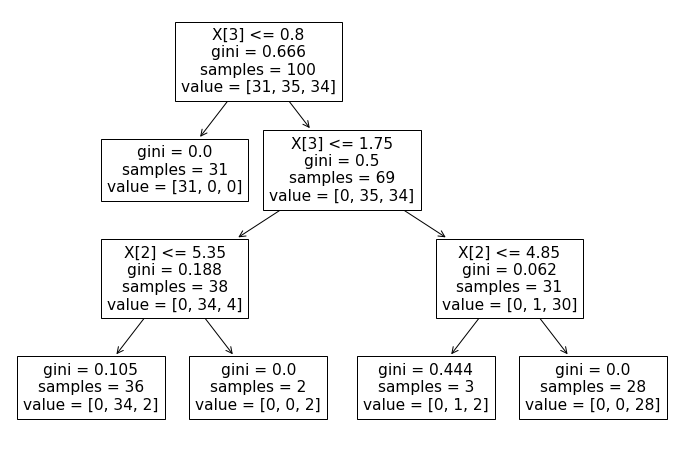

In [39]:
# Plot Decission tree

plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

### Advanced Decision Trees

    There is another crucial improvement made for the decision trees, which is Random forests. These are similar to decision trees but require multiple trees together hence the name forests. Random forests ensemble a supervised learning technique used in machine learning. There are more chances of overfitting in a single decision tree, but with multiple trees together, the training error is minimal as the tree grows deeper and deeper.
    
### Conclusion

    Decision trees are widely used and are one of the most used methods used in predictive modeling. They help predict the future and are very easy to understand. They work more efficiently with discrete attributes, but there are high chances that these trees suffer from error propagation.
    
    Decision trees are also not sensitive to outliers because the partitioning happens based on the proportion of samples within the split ranges and not on absolute values [5]. They are quite intuitive and easy to explain to non-technical users.
    
    Another critical practice for a decision tree is that those non-linear relationships between the parameters do not affect the tree’s performance. Consequently, in decision trees, predictions are faster on high dimensional data.

### Example # 2

In [40]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline


In [41]:
data = pd.read_csv('balance-scale.data',sep= ',', header = None)

data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [42]:
data.shape

(625, 5)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       625 non-null    object
 1   1       625 non-null    int64 
 2   2       625 non-null    int64 
 3   3       625 non-null    int64 
 4   4       625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [44]:
# Get the value of X and y

X = data.drop([0],axis=1)
y = data[0]

X,y

(     1  2  3  4
 0    1  1  1  1
 1    1  1  1  2
 2    1  1  1  3
 3    1  1  1  4
 4    1  1  1  5
 ..  .. .. .. ..
 620  5  5  5  1
 621  5  5  5  2
 622  5  5  5  3
 623  5  5  5  4
 624  5  5  5  5
 
 [625 rows x 4 columns],
 0      B
 1      R
 2      R
 3      R
 4      R
       ..
 620    L
 621    L
 622    L
 623    L
 624    B
 Name: 0, Length: 625, dtype: object)

In [45]:
# split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [46]:
# Decission Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [47]:
# Apply decision tree classification with Gini index:

clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=100,min_samples_leaf=5)

In [48]:
# FIT THE MODEL

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [49]:
# Prediction
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array(['R', 'L', 'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L',
       'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L',
       'L', 'L', 'R', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'L',
       'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L',
       'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R',
       'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'L

In [50]:
# Get accuracy with criterion Gini index:

from sklearn.metrics import accuracy_score
print("Model accuracy: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy: 0.7340


In [51]:
# Confustion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion matrix:', confusion_matrix(y_test,y_pred_gini))

Confusion matrix: [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]


In [52]:
# Classification Report

from sklearn.metrics import classification_report
print('classification_report:', classification_report(y_test,y_pred_gini))

classification_report:               precision    recall  f1-score   support

           B       0.00      0.00      0.00        13
           L       0.73      0.79      0.76        85
           R       0.74      0.79      0.76        90

    accuracy                           0.73       188
   macro avg       0.49      0.53      0.51       188
weighted avg       0.68      0.73      0.71       188



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [53]:
# Check for overfitting and underfitting:

print('Training Set Score:{:.2f}'.format(clf_gini.score(X_train,y_train)))
print('Test Set Score:{:.2f}'.format(clf_gini.score(X_test,y_test)))

Training Set Score:0.77
Test Set Score:0.73


[Text(334.8, 380.52, 'X[2] <= 2.5\ngini = 0.572\nsamples = 437\nvalue = [36, 203, 198]'),
 Text(167.4, 271.8, 'X[1] <= 1.5\ngini = 0.446\nsamples = 165\nvalue = [13, 117, 35]'),
 Text(83.7, 163.07999999999998, 'X[3] <= 2.5\ngini = 0.532\nsamples = 27\nvalue = [4, 6, 17]'),
 Text(41.85, 54.360000000000014, 'gini = 0.653\nsamples = 12\nvalue = [4, 5, 3]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.124\nsamples = 15\nvalue = [0, 1, 14]'),
 Text(251.10000000000002, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.332\nsamples = 138\nvalue = [9, 111, 18]'),
 Text(209.25, 54.360000000000014, 'gini = 0.637\nsamples = 25\nvalue = [5, 9, 11]'),
 Text(292.95, 54.360000000000014, 'gini = 0.18\nsamples = 113\nvalue = [4, 102, 7]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 2.5\ngini = 0.534\nsamples = 272\nvalue = [23, 86, 163]'),
 Text(418.5, 163.07999999999998, 'X[0] <= 1.5\ngini = 0.559\nsamples = 110\nvalue = [11, 62, 37]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.37\ns

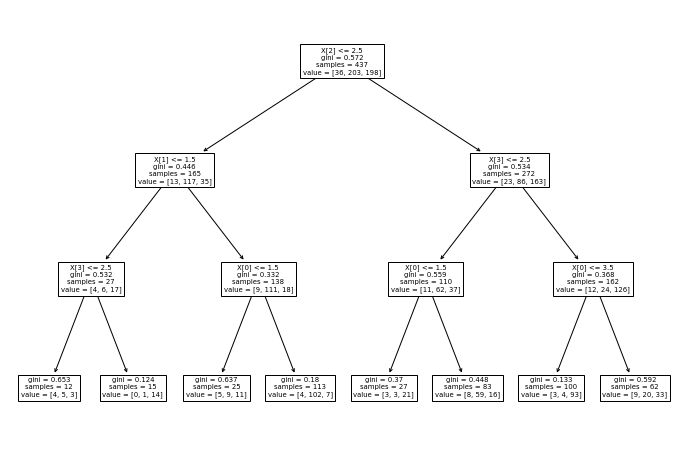

In [54]:
# Plot Decission tree

plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

<font color='grey'>
             
### Use of Decision Trees and Random Forest in Machine Learning

Tree-based learning algorithms are one of the most commonly used supervised learning methods. They empower predictive models with high accuracy, stability, ease of interpretation, and are adaptable at solving any classification or regression problem.
    
Decision Tree predicts the values of responses by learning decision rules derived from features. In a tree structure for classification, the root node represents the entire population, while decision nodes represent the particular point where the decision tree decides on which specific feature to split on. The purity for each feature will be assessed before and after the split. The decision tree will then decide to split on a specific feature that produces the purest leaf nodes (ie. terminal nodes at each branch).

<img src='images/A simple diagram of a decision tree.png'>

A significant advantage of a decision tree is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion. It creates a comprehensive analysis of the consequences along each branch and identifies decision nodes that need further analysis.
    
However, a decision tree has its own limitations. The reproducibility of the decision tree model is highly sensitive, as a small change in the data can result in a large change in the tree structure. Space and time complexity of the decision tree model is relatively higher, leading to longer model training time. A single decision tree is often a weak learner, hence a bunch of decision tree (known as random forest) is required for better prediction.
    
The random forest is a more powerful model that takes the idea of a single decision tree and creates an ensemble model out of hundreds or thousands of trees to reduce the variance. Thus giving the advantage of obtaining a more accurate and stable prediction.
    
Each tree is trained on a random set of observations, and for each split of a node, only a random subset of the features is used for making a split. When making predictions, the random forest does not suffer from overfitting as it averages the predictions for each of the individual decision trees, for each data point, in order to arrive at a final classification. 
    
    
<img src='images/A depiction of the random forest.png'>    

We shall approach a classification problem and explore the basics of how decision trees work, how individual decisions trees are combined to form a random forest, how to fine-tune the hyper-parameters to optimize random forest, and ultimately discover the strengths of using random forests.

### Problem Statement: To predict whether a person makes more than U$50,000 per year.

</font>
             

In [55]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
data = pd.read_csv('adult.data',sep=',',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
# Add Headers to dataframe

headers = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
           'race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

data.columns=headers
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Cleaning

In [58]:
# Check for empty cells and if data types are correct for the respective columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<AxesSubplot:>

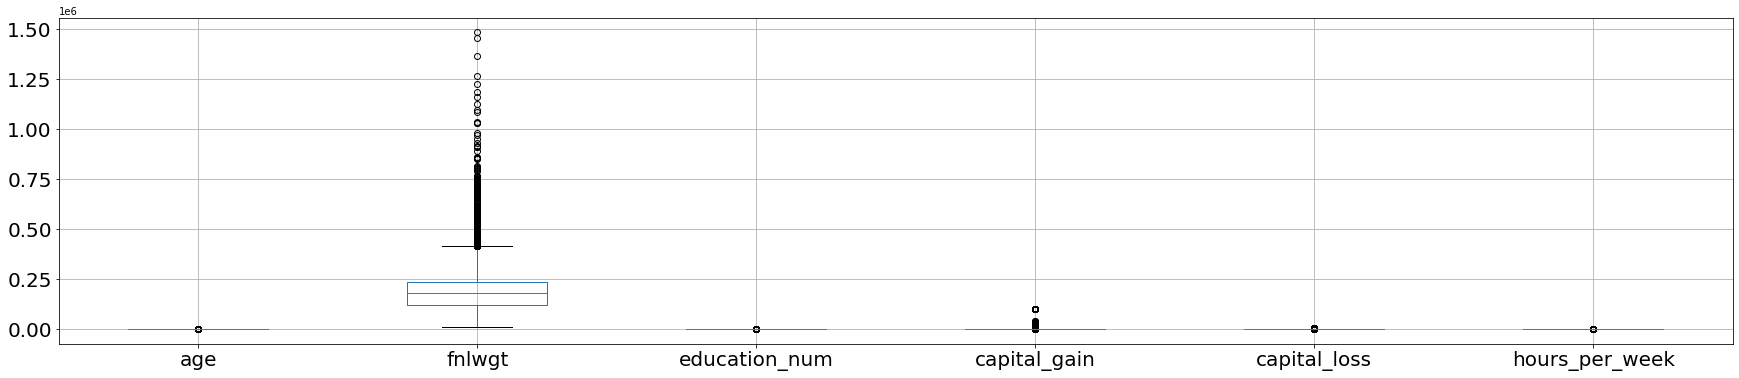

In [59]:
# Use box plot to detect any outliers

data.boxplot(figsize=(30,6),fontsize=20)

In [60]:
# Drop fnlwgt column

clean_df = data.drop(['fnlwgt'],axis=1)
clean_df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [62]:
# Select duplicate rows except first occurrence based on all columns
dup_rows = clean_df[clean_df.duplicated()]
dup_rows

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
352,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
391,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
563,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
570,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
673,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32503,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32512,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32527,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


>* An example of duplicates can be seen in the above rows with the entries “Private” under the “workclass” column. These duplicate rows correspond to samples for different surveyed individuals instead of genuine duplicate rows. As such, we would not remove any duplicated rows to preserve the data for further analysis.*

### Label Encoding

    Categorical features are encoded into numerical values using label encoding, to convert each class under the specified feature to a numerical value.

In [63]:
# categorical boolean mask

categorical_feature_mask = clean_df.dtypes == object # it will covert all numeric values to False and string data to True

# Filter categorical columns using mask and turn it into a list
categorical_cols = clean_df.columns[categorical_feature_mask].tolist()

# Instantiate labelencoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply label encoder on categorical feature columns
clean_df[categorical_cols] = clean_df[categorical_cols].apply(lambda col: le.fit_transform(col))
clean_df[categorical_cols].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


In [64]:
X = clean_df.iloc[:,1:13]   # Independent columns - features
y = clean_df.iloc[:,-1]   # targeted column - income

# Distribution of target variable
print(clean_df["income"].value_counts())

0    24720
1     7841
Name: income, dtype: int64


In [65]:
print(clean_df["income"].value_counts(normalize=True))
# 0 for label: <= U$50K
# 1 for label: > U$50K

0    0.75919
1    0.24081
Name: income, dtype: float64


In [66]:
X

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,7,9,13,4,1,1,4,1,2174,0,40,39
1,6,9,13,2,4,0,4,1,0,0,13,39
2,4,11,9,0,6,1,4,1,0,0,40,39
3,4,1,7,2,6,0,2,1,0,0,40,39
4,4,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,12,2,13,5,4,0,0,0,38,39
32557,4,11,9,2,7,0,4,1,0,0,40,39
32558,4,11,9,6,1,4,4,0,0,0,40,39
32559,4,11,9,4,1,3,4,1,0,0,20,39


    An imbalanced dataset was observed from the above-normalized distribution.
<font color='grey'>
    
### Design of Experiment

It would be interesting to see how different factors can affect the performance of each classifier. Let’s consider the following 3 factors:
    
<img src='images/Design Experiment.png'>

* Number of features: When deciding on the number of features to use for a particular dataset, The Elements of Statistical Learning (section 15.3) states that:

>* Typically, for a classification problem with p features, √p features are used in each split.

Thus, we would perform feature selection to choose the top 4 features for the modeling of the optimized random forest. With the ideal number of features, it would help to prevent overfitting and improve model interpretability.

* **Upsampling:** An imbalanced dataset would lead to a biased model after training. For this particular dataset, we see a distribution of 76% representing the majority class (ie. income <=U$50K) and the remaining 24%  representing the minority class (ie. income >U$50K)

Upon training of the models, we will have the decision tree and random forest achieving a high classification accuracy belonging to the majority class. To overcome this, we would perform an upsampling of the minority class (ie. income >U$50K) to create a balanced dataset for the optimized random forest model.

* **Grid search:** In order to maximize the performance of the random forest, we can perform a grid search for the best hyperparameters and optimize the random forest model.

### Data Modelling

An initial loading and splitting of the dataset were performed to train and test the decision tree and random forest models, before optimizing the random forest.


</font>

In [67]:
from sklearn.model_selection import train_test_split
X_train_bopt, X_test_bopt, y_train_bopt, y_test_bopt = train_test_split(X, y,
                                                                        test_size = 0.3,
                                                                        random_state = 1)

In [68]:
X_train_bopt

,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
16525,5,10,16,2,10,0,4,1,0,0,60,39
14551,4,9,13,4,4,1,4,0,0,0,30,39
518,0,15,10,4,0,4,4,0,0,0,35,39
22524,4,15,10,2,1,0,4,1,0,0,40,39
11425,4,2,8,4,6,3,4,1,0,0,20,39
...,...,...,...,...,...,...,...,...,...,...,...,...
32511,2,9,13,4,1,3,2,0,0,0,40,39
5192,4,9,13,2,4,0,4,1,15024,0,45,39
12172,4,9,13,4,7,1,1,1,0,0,40,0
235,7,11,9,2,8,0,4,1,0,0,40,39


<font color='grey'>

**<u>Standardization</u>** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn. The dataset might behave badly if the individual features do not more or less look like standard normally distributed data, ie. Gaussian with zero mean and unit variance.
</font>

In [69]:
from sklearn import preprocessing

# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train_bopt = scale.fit_transform(X_train_bopt)

# Test features are scaled using the scaler computed for the training features
X_test_bopt = scale.transform(X_test_bopt)

In [70]:
X_train_bopt

array([[ 0.77372722, -0.07787021,  2.29318429, ..., -0.21768425,
         1.57918014,  0.29254012],
       [ 0.08853505, -0.33640157,  1.12830357, ..., -0.21768425,
        -0.84195487,  0.29254012],
       [-2.6522336 ,  1.2147866 , -0.03657715, ..., -0.21768425,
        -0.43843237,  0.29254012],
       ...,
       [ 0.08853505, -0.33640157,  1.12830357, ..., -0.21768425,
        -0.03490987, -4.64490339],
       [ 2.14411154,  0.18066115, -0.42487072, ..., -0.21768425,
        -0.03490987,  0.29254012],
       [ 0.08853505, -0.33640157,  1.12830357, ...,  4.49422474,
         0.36861264,  0.29254012]])

### Model 1: Decission Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Create Decission tree classifier
tree = DecisionTreeClassifier(random_state=1)

# Fit training data and training labels to decission tree
tree.fit(X_train_bopt,y_train_bopt)

DecisionTreeClassifier(random_state=1)

In [72]:
from sklearn.metrics import accuracy_score

print(f'Decission tree has  {tree.tree_.node_count} nodes with a maximum depth of {tree.tree_.max_depth}.')

print(f'Model Accuracy of trained data : {tree.score(X_train_bopt, y_train_bopt)}')

print(f'Model Accuracy of test data : {tree.score(X_test_bopt, y_test_bopt)}')

Decission tree has  6861 nodes with a maximum depth of 41.
Model Accuracy of trained data : 0.928088803088803
Model Accuracy of test data : 0.8404135530760569


    As there was no limit on the depth, the decision tree model was able to classify every training point perfectly to a large extent.
    
### Visualization of the Decision Tree

    By visualizing the decision tree, it will show each node in the tree which we can use to make new predictions. As the tree is relatively large, the decision tree is plotted below, with a maximum depth of 3.

In [73]:
# Create and fit decision tree with maximum depth 3
tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree.fit(X_train_bopt, y_train_bopt)

DecisionTreeClassifier(max_depth=3, random_state=1)

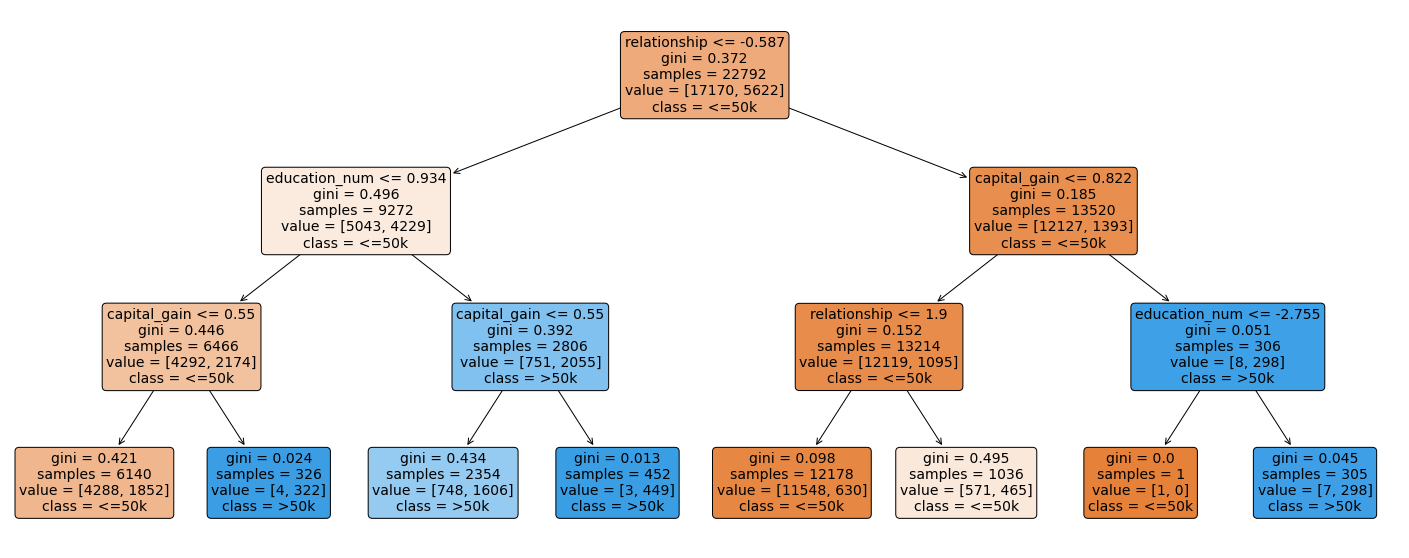

In [74]:
from sklearn.tree import plot_tree
# Plot the decission tree

plt.figure(figsize=(25,10))

decission_tree_plot = plot_tree(tree,feature_names=X.columns,class_names=['<=50k','>50k'],filled=True,rounded=True,fontsize=14)

<font color='grey'>

**For each of the nodes (except the leaf nodes), the five rows represent:**
    
1. **question asked about the data based on a feature:** This determines the way we traverse down the tree for a new data point.
    

2. **gini:** The gini impurity of the node represents the probability that a randomly selected sample from a node will be incorrectly classified according to the distribution of samples in the node. The average (weighted by samples) gini impurity decreases with each level of the tree.
    

3. **samples:** The number of training observations in the node.
    

4. **value:** The number of samples in the respective classes.
    

5. **class:** The class predicted for all the points in the node if the tree ended at this depth.
    
    
The leaf nodes are where the tree makes a prediction. The different colors correspond to the respective classes, with shades ranging from light to dark depending on the gini impurity.

**Pruning the Decision Tree**

Limiting the maximum depth of the decision tree can enable the tree to generalize better to testing data. Although this will lead to reduced accuracy on the training data, it can improve performance on the testing data and provide an objective performance evaluation.
</font>

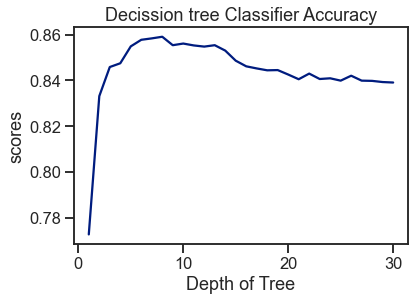

In [75]:
# Create for loop to prune tree

scores = []

for i in range(1,31):
    tree = DecisionTreeClassifier(random_state=1,max_depth=i)
    tree.fit(X_train_bopt, y_train_bopt)
    score = tree.score(X_test_bopt, y_test_bopt)
    scores.append(tree.score(X_test_bopt, y_test_bopt))
    
# Plot graph to see how individual accuracy scores changes with tree graph
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('ticks')

plt.plot(range(1,31),scores)
plt.xlabel("Depth of Tree")
plt.ylabel('scores')
plt.title('Decission tree Classifier Accuracy')
plt.show()


    Using the decision tree, a peak of 86% accuracy was achieved with an optimal tree depth of 10. As the depth of the tree increases, the accuracy score decreases gradually. Hence, a deeper tree depth does not reflect a higher accuracy for prediction.

### Model 2: Random Forest

### Out-of-Bag Error Evaluation

The Random Forest Classifier is trained using bootstrap aggregation, where each new tree is fitted from a bootstrap sample of the training observations. The out-of-bag error is the average error for each training observation calculated using predictions from the trees that do not contain the training observation in their respective bootstrap sample. This allows the Random Forest Classifier to be fitted and validated whilst being trained.
The random forest model was fitted with a range of tree numbers and evaluated on the out-of-bag error for each of the tree’s numbers used.

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
invalid value encountered in true_divide
Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
invalid value encountered in true_divide


[Text(0, 0.5, 'out-of-bag-error'),
 Text(0.5, 1.0, 'Evaluation of out of bag error')]

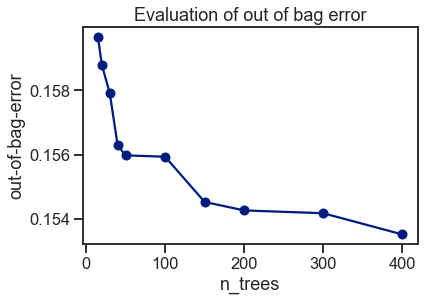

In [76]:
# Initialise the random forest estimator
# Set 'warm_start=true' so the more trees are added to the existing modek for each iteration

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True,random_state=1,warm_start=True,n_jobs=-1)
oob_list=list()

# Iterate through all of the possibilities for the number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    RF.set_params(n_estimators=n_trees) # set number of trees
    RF.fit(X_train_bopt, y_train_bopt)
    oob_error = 1 - RF.oob_score_  # obtain the oob error
    oob_list.append(pd.Series({'n_trees':n_trees, 'oob_error': oob_error}))

rf_oob_df = pd.concat(oob_list,axis=1).T.set_index('n_trees')

ax = rf_oob_df.plot(legend=False,marker='o')
ax.set(ylabel='out-of-bag-error', title='Evaluation of out of bag error')

    The out-of-bag error appeared to have stabilized around 150 trees.


In [77]:
### create the model with 200 trees
forest = RandomForestClassifier(n_estimators=150,random_state=1,n_jobs=-1)

# Fit training data and training labels to forest
forest.fit(X_train_bopt,y_train_bopt)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=1)

In [78]:
n_nodes = []
max_depths = []

for ind_tree in forest.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Random Forest has an average number of nodes {int(np.mean(n_nodes))} with an average maximum depth of {int(np.mean(max_depths))}.')

print(f'Model Accuracy for train data: {forest.score(X_train_bopt, y_train_bopt)}')
print(f'Model Accuracy for test data: {forest.score(X_test_bopt, y_test_bopt)}')

Random Forest has an average number of nodes 5675 with an average maximum depth of 35.
Model Accuracy for train data: 0.928088803088803
Model Accuracy for test data: 0.8546422356433616


    From the above, each decision tree in the random forest has many nodes and is extremely deep. Although each individual decision tree may overfit to a particular subset of the training data, the use of random forest had produced a slightly higher accuracy score for the test data.

### Feature Importance

    The feature importance of each feature of the dataset can be obtained by using the feature importance property of the model. Feature importance gives a score for each feature of the data. The higher the score, the more important or relevant the feature is towards the target variable.

    Feature importance is an in-built class that comes with Tree-Based Classifiers. We have used the decision tree and random forest to rank the feature importance for the dataset.

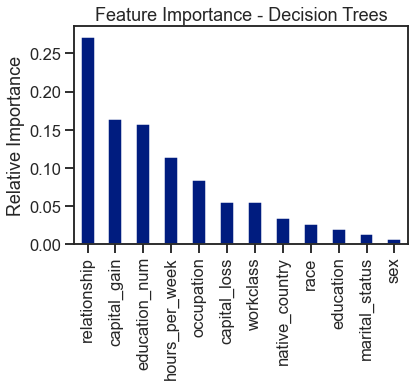

In [79]:
feature_imp = pd.Series(tree.feature_importances_, 
                        index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Feature Importance - Decision Trees',
       ylabel='Relative Importance');
       

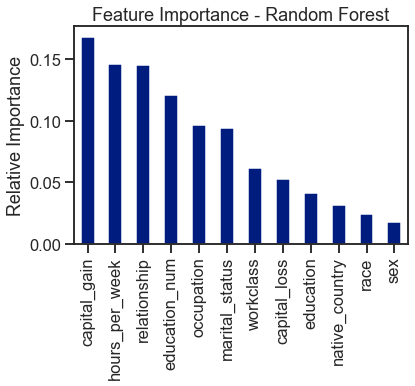

In [80]:
feature_imp = pd.Series(forest.feature_importances_, 
                        index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar')
ax.set(title='Feature Importance - Random Forest',
       ylabel='Relative Importance');

    The features were ranked based on their importance considered by the respective classifiers. The values were computed by summing the reduction in Gini Impurity over all of the nodes of the tree in which the feature is used.

### Feature Selection using 2 Methods:

### 1. Univariate Selection

    Statistical tests can be used to select those features that have the strongest relationship with the target variable. The scikit-learn library provides the SelectKBest class to be used with a suite of different statistical tests to select a specific number of features. We used the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the dataset.

In [81]:
# Apply SelectKBest class to extract top 10 best features

from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate 2 dataframes for better visulaization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))   # print 10 best features

          Features         Score
8     capital_gain  8.219247e+07
9     capital_loss  1.372146e+06
10  hours_per_week  6.476409e+03
5     relationship  3.659143e+03
2    education_num  2.401422e+03
3   marital_status  1.123470e+03
4       occupation  5.045589e+02
7              sex  5.024394e+02
1        education  2.979423e+02
0        workclass  4.750812e+01


<font color='grey'>

### 2. Correlation Matrix with Heat Map

Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable). A heat map makes it easy to identify which features are most related to the target variable.
</font>

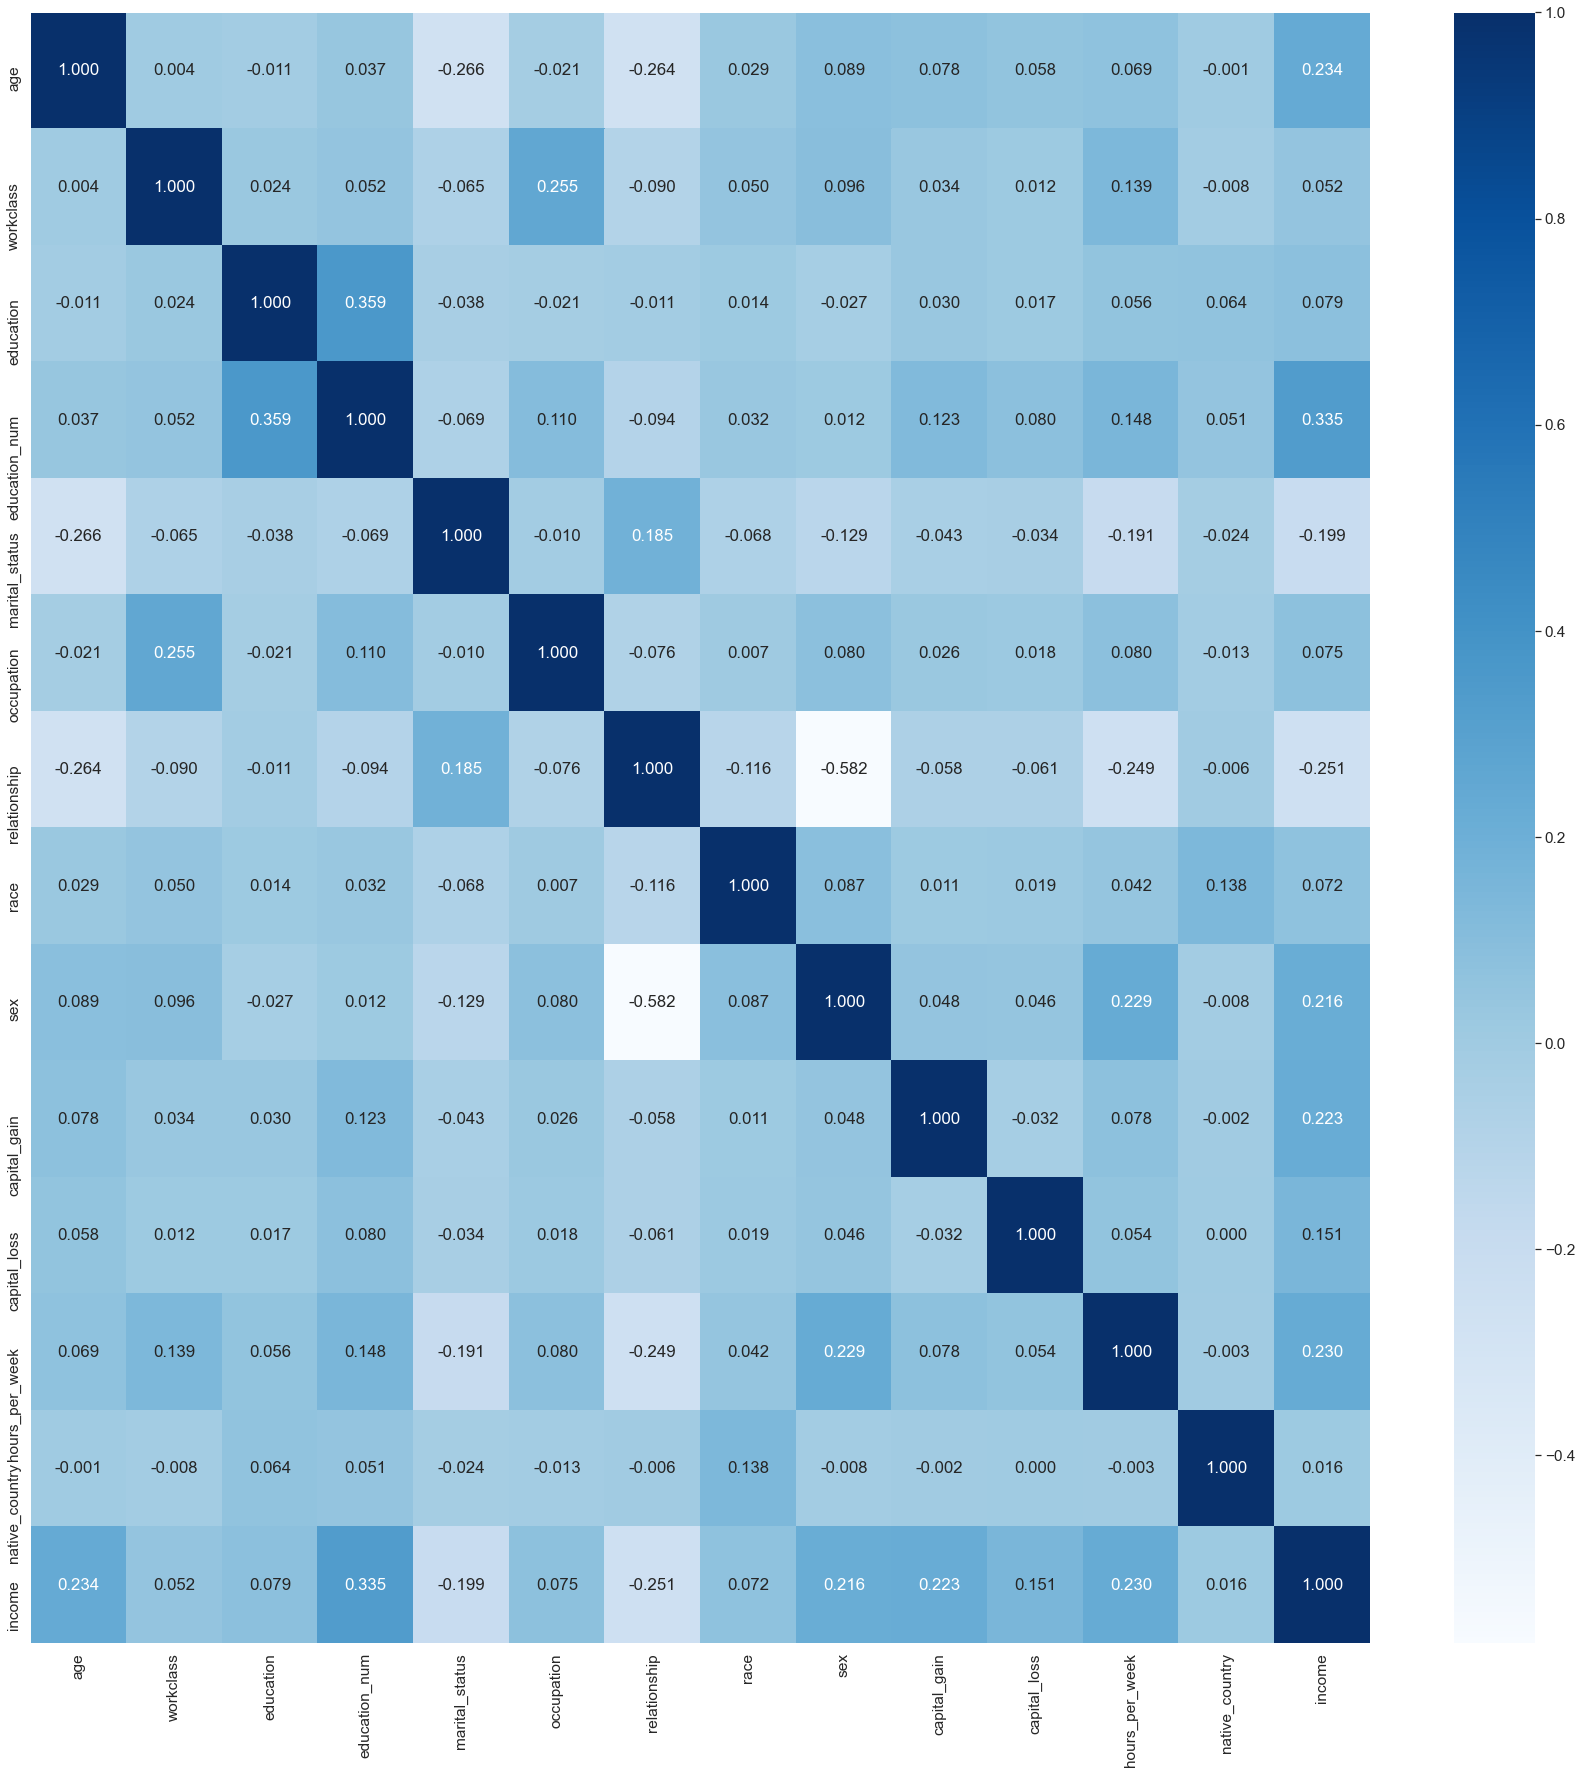

In [82]:
# Obtain correlations of each feature in dataset

import seaborn as sns
sns.set(font_scale=1.4)
corrmat = clean_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))

# plot heat map
correlation = sns.heatmap(clean_df[top_corr_features].corr(),annot=True,fmt='.3f',cmap='Blues')

<font color='grey'>

### Upsampling

Upsampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal. There are several heuristics for doing so, but the most common way is to simply resample with replacement.

</font>

In [83]:
# separate majority and minority classes

df_majority = clean_df[clean_df.income==0]
df_minority = clean_df[clean_df.income==1]

# Upsampling minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True,   # sample with replacement
                                 n_samples = 24720,  # to match majority class
                                 random_state = 1   # reproducible results
                                 )

# combined majority class with upsampled minority class
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

# Display new class counts
df_upsampled.income.value_counts()

1    24720
0    24720
Name: income, dtype: int64

In [84]:
df_upsampled.income.value_counts(normalize=True)

1    0.5
0    0.5
Name: income, dtype: float64

    Now that the dataset has been balanced, we are ready to split and scale this dataset for training and testing using the optimized random forest model.

In [85]:
X_upsamp = df_upsampled.drop(['income'],axis=1)
y_upsamp = df_upsampled['income']

X_train, X_test, y_train, y_test = train_test_split(X_upsamp, y_upsamp, 
                                                    test_size = 0.3, 
                                                    random_state = 1)
                                                    
# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)

# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

<font color='grey'>

### Random Forest Optimization through Grid Search

**Grid search** is an **exhaustive search over specified parameter values for an estimator.** It selects combinations of hyperparameters from a grid, evaluates them using cross-validation on the training data, and returns the values that perform the best.
We have selected the following model parameters for the grid search:

* n_estimators: The number of trees in the forest.
* max_depth: The maximum depth of the tree.
* min_samples_split: The minimum number of samples required to split an internal node.
</font>

In [86]:
# Set the model parameters for grid search
model_params = {'n_estimators': [150, 200, 250, 300],
                'max_depth': [15, 20, 25],
                'min_samples_split': [2, 4, 6]}

# Create random forest classifier model
rf_model = RandomForestClassifier(random_state=1)

from sklearn.model_selection import GridSearchCV

# Set up grid search meta-estimator
gs = GridSearchCV(rf_model, model_params,n_jobs=-1, scoring='roc_auc', cv=3)

# Train the grid search meta-estimator to find the best model
best_model = gs.fit(X_train, y_train)

# Print best set of hyperparameters
from pprint import pprint
pprint(best_model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


    Based on the grid search, the best hyperparameter values were not the defaults. This shows the importance of tuning a model for a specific dataset. Each dataset will have different characteristics, and the model that does best on one dataset will not necessarily do the best across all datasets.


<font color='grey'>

### Use the Best Model to Optimize Random Forest

</font>

In [87]:
n_nodes = []
mx_depths=[]

for ind_tree in best_model.best_estimator_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'The optimized random forest has an average number of nodes {int(np.mean(n_nodes))} with an average maximum depth of {int(np.mean(max_depths))}')

The optimized random forest has an average number of nodes 7367 with an average maximum depth of 28


    The best maximum depth was not unlimited, this indicates that restricting the maximum depth of the individual decision trees can improve the cross validation performance of the random forest.

In [88]:
print(f'Model Accuracy for train data: {best_model.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {best_model.score(X_test, y_test)}')

Model Accuracy for train data: 0.9965754945413912
Model Accuracy for test data: 0.973485778180232


<font color='grey'>

### Performance Evaluation of Models
</font>

In [89]:
# Predict target variables (ie. labels) for each classifer
dt_classifier_name = ["Decision Tree"]
dt_predicted_labels = tree.predict(X_test_bopt)

rf_classifier_name = ["Random Forest"]
rf_predicted_labels = forest.predict(X_test_bopt)

best_model_classifier_name = ["Optimized Random Forest"]
best_model_predicted_labels = best_model.predict(X_test)

<font color='grey'>

### 1. Classification Report

According to the Yellowbrick documentation,

The **classification report** shows a representation of the main classification metrics on a per-class basis and gives a deeper intuition of the classifier behavior over global accuracy, which can mask functional weaknesses in one class of a multi-class problem. The metrics are defined in terms of true and false positives, and true and false negatives.

**Precision** is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of true and false positives.

For all instances classified positive, what percent was correct?

**Recall** is the ability of a classifier to find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.

For all instances that were actually positive, what percent was classified correctly?

The **F1-score** is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally, F1-scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of the F1-score should be used to compare classifier models, not global accuracy.

**Support** is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or re-balancing. Support does not change between models but instead diagnoses the evaluation process.</font>

In [90]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score

print('Classification Report for',dt_classifier_name,':\n',
     metrics.classification_report(y_test_bopt,dt_predicted_labels,target_names=['Income <= U$50K','Income > U$50K']))

print('Classification Report for',rf_classifier_name,':\n',
     metrics.classification_report(y_test_bopt,rf_predicted_labels,target_names=['Income <= U$50K','Income > U$50K']))

print('Classification Report for',best_model_classifier_name,':\n',
     metrics.classification_report(y_test,best_model_predicted_labels,target_names=['Income <= U$50K','Income > U$50K']))

Classification Report for ['Decision Tree'] :
                  precision    recall  f1-score   support

Income <= U$50K       0.89      0.91      0.90      7550
 Income > U$50K       0.66      0.60      0.63      2219

       accuracy                           0.84      9769
      macro avg       0.77      0.76      0.76      9769
   weighted avg       0.83      0.84      0.84      9769

Classification Report for ['Random Forest'] :
                  precision    recall  f1-score   support

Income <= U$50K       0.89      0.92      0.91      7550
 Income > U$50K       0.71      0.62      0.66      2219

       accuracy                           0.85      9769
      macro avg       0.80      0.77      0.78      9769
   weighted avg       0.85      0.85      0.85      9769

Classification Report for ['Optimized Random Forest'] :
                  precision    recall  f1-score   support

Income <= U$50K       0.97      0.84      0.90      7516
 Income > U$50K       0.86      0.97      0.

<font color='grey'>

The optimized random forest has performed well in the above metrics. In particular, with upsampling performed to maintain a balanced dataset, a significant observation was noted **in the minority class** (ie. label ‘1’ representing income > U$50K), where **recall scores had improved 35%, from 0.62 to 0.84, by using the optimized random forest model.**

With a **higher precision and recall scores**, the optimized random forest model was able to correctly label instances that were indeed positive. Out of these instances which were actually positive, the optimized random forest model had classified them correctly to a large extent. This directly translates into a **higher F1-score** as a weighted harmonic mean of precision and recall.

### 2. Confusion Matrix
The **confusion matrix** takes a fitted scikit-learn classifier and a set of test x and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. These provide similar information as what is available in a classification report, but rather than top-level scores, they provide deeper insight into the classification of individual data points.
</font>

Confusion matrix for ['Decision Tree']


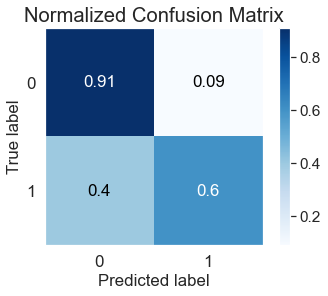

Confusion matrix for ['Random Forest']


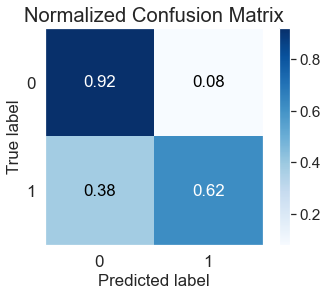

Confusion matrix for ['Optimized Random Forest']


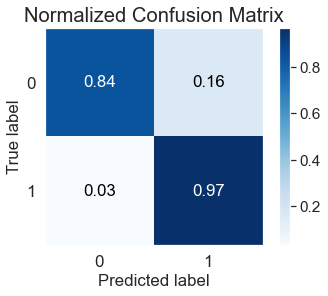

In [91]:
import scikitplot as skplt
print('Confusion matrix for',dt_classifier_name)
skplt.metrics.plot_confusion_matrix(y_test_bopt,dt_predicted_labels,normalize=True)
plt.show()

print('Confusion matrix for',rf_classifier_name)
skplt.metrics.plot_confusion_matrix(y_test_bopt,rf_predicted_labels,normalize=True)
plt.show()

print('Confusion matrix for',best_model_classifier_name)
skplt.metrics.plot_confusion_matrix(y_test,best_model_predicted_labels,normalize=True)
plt.show()

<font color='grey'>
    
The optimized random forest had performed well with a decrease in the Type 2 Error: False Negatives (predicted income <= U$50K but actually income > U$50K). A remarkable decrease of 58% was obtained from a score of 0.38 to 0.16 when comparing the results for decision tree against the optimized random forest.

However, the Type 1 Error: False Positives (predicted > U$50K but actually <= U$50K) had approximately tripled, from 0.08 to 0.25, by comparing the optimized random forest with the default random forest model.

Overall, the impact of having more false positives was mitigated with a notable decrease in false negatives. With a good outcome of the test values predicted classes as compared to their actual classes, the confusion matrix results for the optimized random forest had outperformed the other models. 

### 3. Precision-Recall Curve
    
**Precision-Recall curve** is a metric used to evaluate a classifier’s quality. The precision-recall curve shows the trade-off between precision, a measure of result relevancy, and recall, a measure of how many relevant results are returned. A large area under the curve represents both high recall and precision, the best-case scenario for a classifier, showing a model that returns accurate results for the majority of classes it selects.

</font>

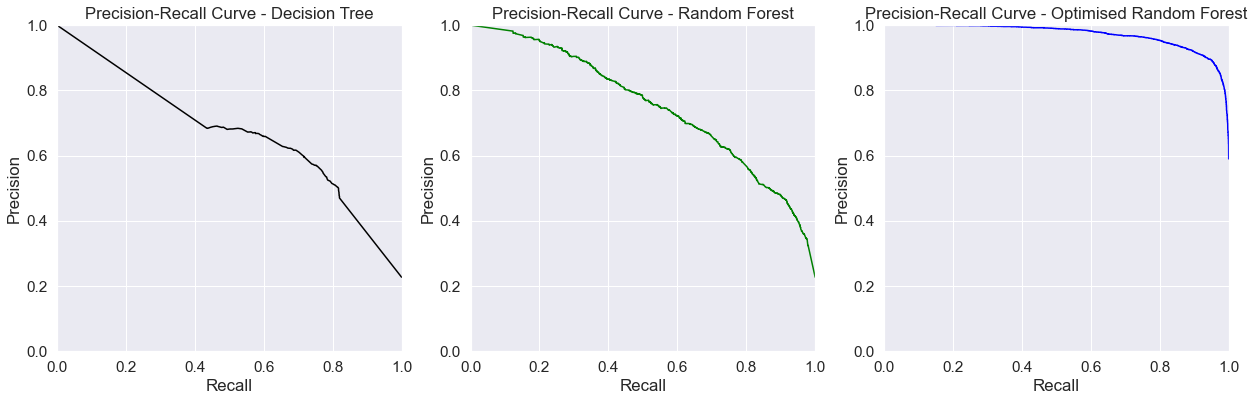

In [92]:
fig,axList = plt.subplots(ncols=3)
fig.set_size_inches(21,6)

# Plot the precision recall curve on Decission Tree
ax = axList[0]
dt_predicted_proba = tree.predict_proba(X_test_bopt)
precision,recall,_ = precision_recall_curve(y_test_bopt,dt_predicted_proba[:,1])
ax.plot(recall,precision,color='black')
ax.set(xlabel='Recall',ylabel='Precision',xlim=[0,1],ylim=[0,1],title='Precision-Recall Curve - Decision Tree')
ax.grid(True)

# Plot the precision recall curve on Random Forest
ax = axList[1]
rf_predicted_proba = forest.predict_proba(X_test_bopt)
precision,recall,_ = precision_recall_curve(y_test_bopt,rf_predicted_proba[:,1])
ax.plot(recall,precision,color='green')
ax.set(xlabel='Recall',ylabel='Precision',xlim=[0,1],ylim=[0,1],title='Precision-Recall Curve - Random Forest')
ax.grid(True)


# Plot the precision recall curve on Optimized Random Forest
ax = axList[2]
best_model_predicted_proba = best_model.predict_proba(X_test)
precision,recall,_ = precision_recall_curve(y_test,best_model_predicted_proba[:,1])
ax.plot(recall,precision,color='blue')
ax.set(xlabel='Recall',ylabel='Precision',xlim=[0,1],ylim=[0,1],title='Precision-Recall Curve - Optimised Random Forest')
ax.grid(True)

    The optimized random forest classifier achieved a higher area under the precision-recall curve. This represents high recall and precision scores, where high precision relates to a low false-positive rate, and a high recall relates to a low false-negative rate. High scores in both showed that the optimized random forest classifier had returned accurate results (high precision), as well as a majority of all positive results (high recall).

<font color='grey'>

### 4. ROC Curve and AUC

A Receiver Operating Characteristic (“ROC”)/Area Under the Curve (“AUC”) plot allows the user to visualize the trade-off between the classifier’s sensitivity and specificity.
    
The **ROC** is a measure of a classifier’s predictive quality that compares and visualizes the trade-off between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.
    
**AUC** is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.
</font>

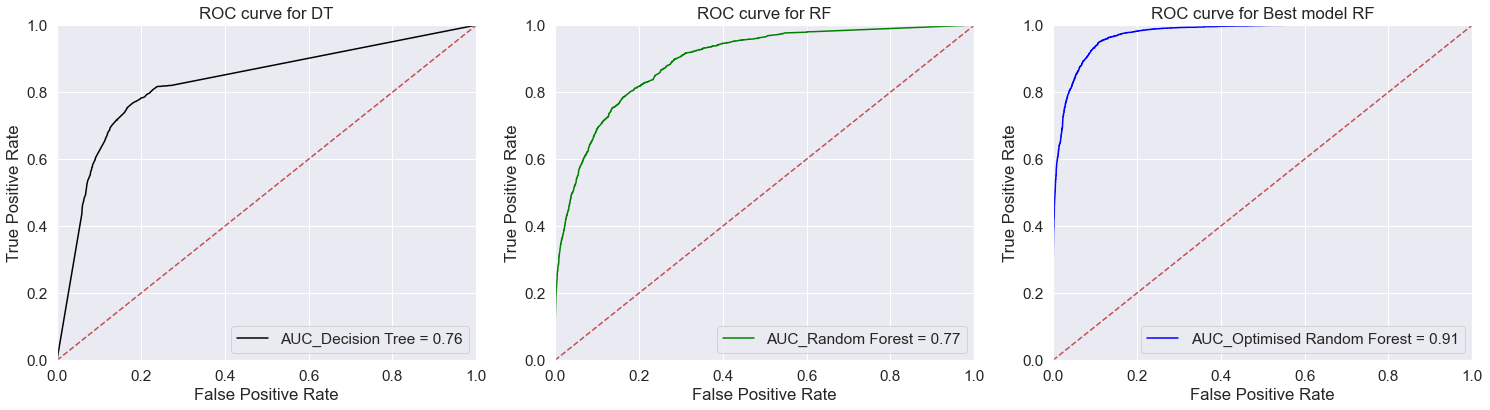

In [93]:
fig, axList = plt.subplots(ncols=3)
fig.set_size_inches(21,6)

# Plot the ROC-AUC curve for Decision Tree
ax = axList[0]
dt = tree.fit(X_train_bopt, y_train_bopt.values.ravel()) 
dt_predicted_label_r = dt.predict_proba(X_test_bopt)

def plot_auc(y, probs):
    fpr, tpr, threshold = roc_curve(y, probs[:,1])
    auc = roc_auc_score(y_test_bopt, dt_predicted_labels)
    ax.plot(fpr, tpr, color = 'black', label = 'AUC_Decision Tree = %0.2f' % auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.legend(loc = 'lower right')
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[0, 1], ylim=[0, 1],
           title='ROC curve for DT')       
    
plot_auc(y_test_bopt, dt_predicted_label_r)
ax.grid(True)

# Plot the ROC-AUC curve for Random Forest
ax = axList[1]
rf = forest.fit(X_train_bopt, y_train_bopt.values.ravel()) 
rf_predicted_label_r = rf.predict_proba(X_test_bopt)

def plot_auc(y, probs):
    fpr, tpr, threshold = roc_curve(y, probs[:,1])
    auc = roc_auc_score(y_test_bopt, rf_predicted_labels)
    ax.plot(fpr, tpr, color = 'green', label = 'AUC_Random Forest = %0.2f' % auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.legend(loc = 'lower right')
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[0, 1], ylim=[0, 1],
           title='ROC curve for RF') 
    
plot_auc(y_test_bopt, rf_predicted_label_r);
ax.grid(True)

# Plot the ROC-AUC curve for Optimized Random Forest
ax = axList[2]
best_model = best_model.fit(X_train, y_train.values.ravel()) 
best_model_predicted_label_r = best_model.predict_proba(X_test)

def plot_auc(y, probs):
    fpr, tpr, threshold = roc_curve(y, probs[:,1])
    auc = roc_auc_score(y_test, best_model_predicted_labels)
    ax.plot(fpr, tpr, color = 'blue', label = 'AUC_Optimised Random Forest = %0.2f' % auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.legend(loc = 'lower right')
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[0, 1], ylim=[0, 1],
           title='ROC curve for Best model RF') 
    
plot_auc(y_test, best_model_predicted_label_r);
ax.grid(True)
plt.tight_layout()

<font color='grey'>
    
All the models had outperformed the baseline guess with the optimized random forest achieving the best AUC results. Thus, indicating that the optimized random forest is a better classifier.
    
### 5. Calibration Curve
    
When performing classification, one often wants to predict not only the class label, but also the associated probability. This probability gives some kind of confidence on the prediction. Thus, the calibration plot is useful for determining whether predicted probabilities can be interpreted directly as an confidence level.
    
</font>

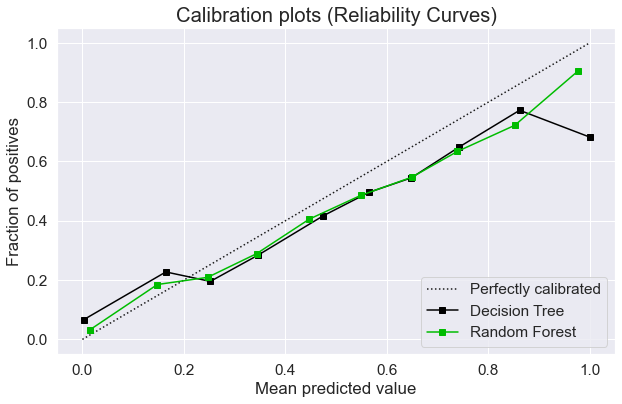

In [94]:
# Plot calibration curves for a set of classifier probability estimates.
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

tree_probas = tree.fit(X_train_bopt, y_train_bopt).predict_proba(X_test_bopt)
forest_probas = forest.fit(X_train_bopt, y_train_bopt).predict_proba(X_test_bopt)

probas_list = [tree_probas, forest_probas]
clf_names = ['Decision Tree','Random Forest']

skplt.metrics.plot_calibration_curve(y_test_bopt, probas_list, clf_names,figsize=(10,6))
plt.show()

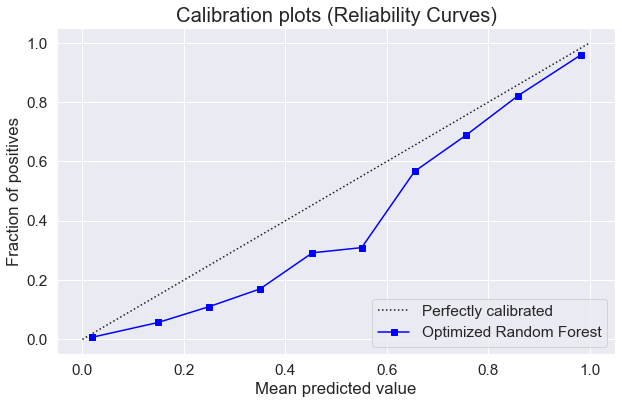

In [95]:
# Plot calibration curves for a set of classifier probability estimates.
best_model = RandomForestClassifier()

best_model_probas = best_model.fit(X_train, y_train).predict_proba(X_test)

probas_list = [best_model_probas]
clf_names = ['Optimized Random Forest']

skplt.metrics.plot_calibration_curve(y_test, probas_list, clf_names, cmap='winter', figsize=(10,6))
plt.show()

<font color='grey'>

Compared to the other two models, the calibration plot for the optimized random forest was the closest to being perfectly calibrated. Hence, the optimized random forest was more reliable and better able to generalize to new data.

### Conclusion

The **optimized random forest had a better generalization performance** on the testing set with reduced variance as compared to the other models. Decision trees tend to overfit and pruning helped to reduce variance to a point. The random forest addressed the shortcomings of decision trees with a strong modeling technique which was more robust than a single decision tree.

The **use of optimization for random forest** had a significant impact on the results with the following 3 factors being considered:

* **Feature selection** to chose the ideal number of features to prevent overfitting and improve model interpretability
* **Upsampling** of the minority class to create a balanced dataset
* **Grid search** to select the best hyper-parameters to maximize model performance
    
Lastly, the results were also attributed by the unique quality of random forest, where it adds additional randomness to the model while growing the trees. Instead of searching for the most important feature while splitting a node, it **searches for the best feature among a random subset of features.** This results in a wide diversity that generally results in a better model for classification problems.

</font>

<font color='grey'>

### ExplainerDashBoard

>As the name suggests, this Python package enables us to build up a web app or inline notebook based explainable dashboard. What this means is that the various components of the dashboard are self-explanatory and you need not explicitly define each of them. It presents all the interactive components with the help of Dash, for all the plots it uses Ploty and runs on a flask server as a web app.

>[Documentation](https://explainerdashboard.readthedocs.io/en/latest/index.html)
    
```python
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer,ExplainerDashboard
from explainerdashboard.datasets import titanic_survive,titanic_names

feature_descriptions = {
    "Sex": "Gender of passenger",
    "Gender": "Gender of passenger",
    "Deck": "The deck the passenger had their cabin on",
    "PassengerClass": "The class of the ticket: 1st, 2nd or 3rd class",
    "Fare": "The amount of money people paid", 
    "Embarked": "the port where the passenger boarded the Titanic. Either Southampton, Cherbourg or Queenstown",
    "Age": "Age of the passenger",
    "No_of_siblings_plus_spouses_on_board": "The sum of the number of siblings plus the number of spouses on board",
    "No_of_parents_plus_children_on_board" : "The sum of the number of parents plus the number of children on board",
}

X_train,y_train,X_test,y_test = titanic_survive()
train_names,test_names = titanic_names()
model = RandomForestClassifier(n_estimators=50,max_depth=5)
model.fit(X_train,y_train)

explainer = ClassifierExplainer(model,X_test,y_test,cats=['Deck','Embarked',
                               {'Gender': ['Sex_male', 'Sex_female', 'Sex_nan']}],
                                  descriptions=feature_descriptions, # defaults to None
                                  labels=['Not survived', 'Survived'], # defaults to ['0', '1', etc]
                                  idxs = test_names, # defaults to X.index
                                  index_name = "Passenger", # defaults to X.index.name
                                  target = "Survival", # defaults to y.name
                               )

db = ExplainerDashboard(explainer,title='Titanic Explainer',whatif=False)
db.run(port=8050)
```
### Let’s understand the code:
    
>- In the first line, we are simply importing the Scikit-learn machine learning models. For this example, the famous titanic dataset, the Random Forest classifier is chosen.
>- Now comes the beast, the explainer dashboard. According to the documentation, any type of model is placed under the explainers category. You can import any of the four explainers: classifier, regressor, xgboost, or random forest. Here we are using the classifier explainer.
>- Split the data into 70/30 train & test model
>- After that, a model is trained with 50 estimators and 5 max_depth of the trees.
>- Now we need to create an explainer object that takes in the model, test data, and other optional parameters such as specifying categorical data will allow the dashboard to group them and use it to plot graphs following these columns. You can check the parameters in the documentation.
>- The ExplainerDashboard API takes in the explainer created and the run function initiates the process.
</font>

In [101]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer,ExplainerDashboard


feature_descriptions = {
    "Workclass": "Class of work",
    "Education": "Highest education level",
    "Education Number": "Value",
    "Maritial Status": "Marriage",
    "Occupation": "Employment", 
    "Relationship": "Relationship I am not sure",
    "Race": "Race of person",
    "Sex": "Sex of person",
    "Capital Gain" : "The gain",
    "Capital loss": "How much lost",
    "Hours per week": "How much time worked",
    "Native country": "Country of orign",
    "Income": "Income of person"
}

X_train, X_test, y_train, y_test = train_test_split(X_upsamp, y_upsamp, 
                                                    test_size = 0.3, 
                                                    random_state = 1)
#train_names,test_names = titanic_names()
model = RandomForestClassifier(n_estimators=50,max_depth=5)
model.fit(X_train,y_train)

explainer = ClassifierExplainer(model,X_test,y_test,
                                  descriptions=feature_descriptions, # defaults to None

db = ExplainerDashboard(explainer,title='Income Explainer',whatif=False)
db.run(port=8050)

SyntaxError: invalid syntax (<ipython-input-101-0d615988a426>, line 32)

In [102]:
 age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income 

SyntaxError: invalid syntax (<ipython-input-102-849d924648f8>, line 1)